# Inception V2,3

In [1]:
import tensorflow as tf

In [2]:
num_classes = 1000
input_shape = [244, 244, 3]

batch_size = 16
num_epochs = 10

## Inception module

In [3]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,\
                                    GlobalAveragePooling2D, Dense, Dropout, \
                                    Flatten, concatenate, Resizing

from typing import Dict
from IPython.display import Image

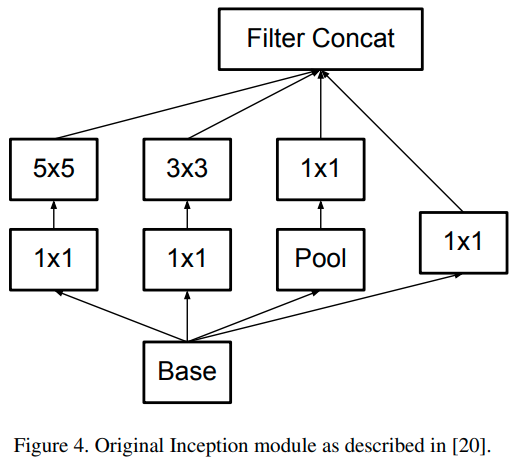

In [4]:
Image('image/inceptionv2-fig4.png')

In [5]:
def inception_origin(filters: Dict[str, int]):
    def layer_fn(x):
        path1 = Conv2D(filters=filters['5x5_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path1 = Conv2D(filters=filters['5x5'], kernel_size=5, 
                       padding='same', activation='relu')(path1)

        path2 = Conv2D(filters=filters['3x3_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path2 = Conv2D(filters=filters['3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path2)

        path3 = MaxPooling2D(pool_size=3, strides=(1, 1), 
                          padding='same')(x)
        path3 = Conv2D(filters=filters['pool_proj'], kernel_size=1, 
                       padding='valid', activation='relu')(path3)

        path4 = Conv2D(filters=filters['1x1'], kernel_size=1, 
               padding='valid', activation='relu')(x)
        
        return concatenate([path1, path2, path3, path4], axis=-1)
    return layer_fn

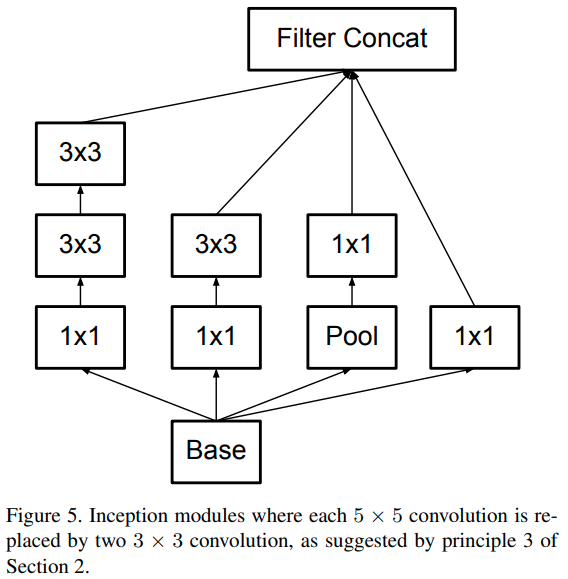

In [6]:
Image('image/inceptionv2-fig5.png')

In [7]:
def inceptionA(filters: Dict[str, int]):
    def layer_fn(x):
        path1 = Conv2D(filters=filters['1_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path1 = Conv2D(filters=filters['1_2_3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path1)
        path1 = Conv2D(filters=filters['1_3_3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path1)

        path2 = Conv2D(filters=filters['2_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path2 = Conv2D(filters=filters['2_2_3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path2)

        path3 = MaxPooling2D(pool_size=3, strides=(1, 1), 
                          padding='same')(x)
        path3 = Conv2D(filters=filters['pool_proj'], kernel_size=1, 
                       padding='valid', activation='relu')(path3)

        path4 = Conv2D(filters=filters['1x1'], kernel_size=1, 
               padding='valid', activation='relu')(x)
        
        return concatenate([path1, path2, path3, path4], axis=-1)
    return layer_fn

In [8]:
filters_A1 = {"1_1_reduce": 64, "1_2_3x3": 96, "1_3_3x3": 96,
              "2_1_reduce": 48, "2_2_3x3": 64, 
              "pool_proj": 64,
              "1x1": 64}
filters_A2 = {"1_1_reduce": 64, "1_2_3x3": 96, "1_3_3x3": 96,
              "2_1_reduce": 48, "2_2_3x3": 64, 
              "pool_proj": 64,
              "1x1": 64}
filters_A3 = {"1_1_reduce": 64, "1_2_3x3": 96, "1_3_3x3": 96,
              "2_1_reduce": 48, "2_2_3x3": 64, 
              "pool_proj": 64,
              "1x1": 64}

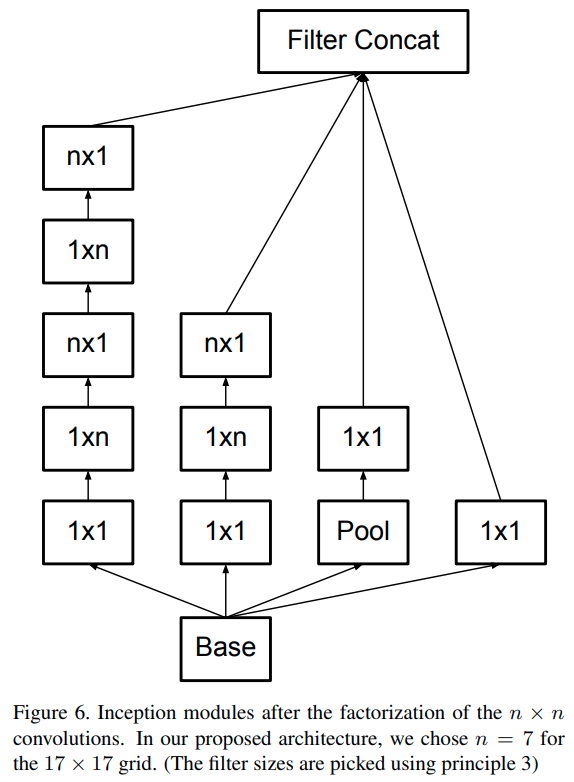

In [9]:
Image('image/inceptionv2-fig6.png')

In [10]:
def inceptionB(filters: Dict[str, int], n):
    def layer_fn(x):
        path1 = Conv2D(filters=filters['1_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path1 = Conv2D(filters=filters['1_2_1xn'], kernel_size=(1, n), 
                       padding='same', activation='relu')(path1)
        path1 = Conv2D(filters=filters['1_3_nx1'], kernel_size=(n, 1), 
                       padding='same', activation='relu')(path1)
        path1 = Conv2D(filters=filters['1_4_1xn'], kernel_size=(1, n), 
                       padding='same', activation='relu')(path1)
        path1 = Conv2D(filters=filters['1_5_nx1'], kernel_size=(n, 1), 
                       padding='same', activation='relu')(path1)

        path2 = Conv2D(filters=filters['2_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path2 = Conv2D(filters=filters['2_2_1xn'], kernel_size=(1, n), 
                       padding='same', activation='relu')(path2)
        path2 = Conv2D(filters=filters['2_2_nx1'], kernel_size=(n, 1), 
                       padding='same', activation='relu')(path2)

        path3 = MaxPooling2D(pool_size=3, strides=(1, 1), 
                          padding='same')(x)
        path3 = Conv2D(filters=filters['pool_proj'], kernel_size=1, 
                       padding='valid', activation='relu')(path3)

        path4 = Conv2D(filters=filters['1x1'], kernel_size=1, 
               padding='valid', activation='relu')(x)
        
        return concatenate([path1, path2, path3, path4], axis=-1)
    return layer_fn

In [11]:
filters_B1 = {"1_1_reduce": 128, "1_2_1xn": 128, "1_3_nx1": 128, 
              "1_4_1xn": 128, "1_5_nx1": 192,
              "2_1_reduce": 128, "2_2_1xn": 128, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}
filters_B2 = {"1_1_reduce": 160, "1_2_1xn": 160, "1_3_nx1": 160, 
              "1_4_1xn": 160, "1_5_nx1": 192,
              "2_1_reduce": 160, "2_2_1xn": 160, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}
filters_B3 = {"1_1_reduce": 160, "1_2_1xn": 160, "1_3_nx1": 160, 
              "1_4_1xn": 160, "1_5_nx1": 192,
              "2_1_reduce": 160, "2_2_1xn": 160, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}
filters_B4 = {"1_1_reduce": 192, "1_2_1xn": 192, "1_3_nx1": 192, 
              "1_4_1xn": 192, "1_5_nx1": 192,
              "2_1_reduce": 192, "2_2_1xn": 192, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}
filters_B5 = {"1_1_reduce": 192, "1_2_1xn": 192, "1_3_nx1": 192, 
              "1_4_1xn": 192, "1_5_nx1": 192,
              "2_1_reduce": 192, "2_2_1xn": 192, "2_2_nx1": 192,
              "pool_proj": 192,
              "1x1": 192}

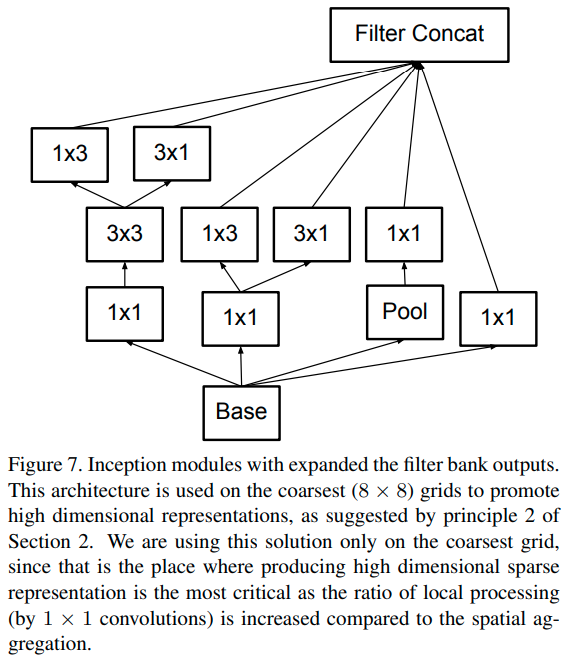

In [12]:
Image('image/inceptionv2-fig7.png')

In [13]:
def inceptionC(filters: Dict[str, int]):
    def layer_fn(x):
        path1 = Conv2D(filters=filters['1_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path1 = Conv2D(filters=filters['1_2_3x3'], kernel_size=3, 
                       padding='same', activation='relu')(path1)
        path1_1 = Conv2D(filters=filters['1_3_1x3'], kernel_size=(1, 3), 
                       padding='same', activation='relu')(path1)
        path1_2 = Conv2D(filters=filters['1_4_3x1'], kernel_size=(3, 1), 
                       padding='same', activation='relu')(path1)

        path2 = Conv2D(filters=filters['2_1_reduce'], kernel_size=1, 
                       padding='valid', activation='relu')(x)
        path2_1 = Conv2D(filters=filters['2_2_1x3'], kernel_size=(1, 3), 
                       padding='same', activation='relu')(path2)
        path2_2 = Conv2D(filters=filters['2_2_3x1'], kernel_size=(3, 1), 
                       padding='same', activation='relu')(path2)

        path3 = MaxPooling2D(pool_size=3, strides=(1, 1), 
                          padding='same')(x)
        path3 = Conv2D(filters=filters['pool_proj'], kernel_size=1, 
                       padding='valid', activation='relu')(path3)

        path4 = Conv2D(filters=filters['1x1'], kernel_size=1, 
               padding='valid', activation='relu')(x)
        
        return concatenate([path1_1, path1_2, path2_1, path2_2, path3, path4], axis=-1)
    return layer_fn

In [ ]:
filters_C1 = {"1_1_reduce": 448, "1_2_3x3": 384, "1_3_1x3": 384, "1_4_3x1": 384,
              "2_1_reduce": 384, "2_2_1x3": 384, "2_2_3x1": 384,
              "pool_proj": 192,
              "1x1": 320}
filters_C2 = {"1_1_reduce": 448, "1_2_3x3": 384, "1_3_1x3": 384, "1_4_3x1": 384,
              "2_1_reduce": 384, "2_2_1x3": 384, "2_2_3x1": 384,
              "pool_proj": 192,
              "1x1": 320}